In [2]:
import keras
import numpy as np

In [3]:
image = keras.utils.load_img(
    "./pilot/EOSINOPHIL/_0_1414.jpeg",
    color_mode="rgb",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False,
)

In [4]:
input_arr = keras.utils.img_to_array(image)

In [5]:
input_arr = np.array([input_arr])

In [6]:
input_arr.shape

(1, 240, 320, 3)

In [7]:
tr =keras.utils.image_dataset_from_directory( "TRAIN", labels='inferred')
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "./TRAIN/",
    validation_split=0.2,
    subset="both",
    seed=1337
)

Found 9957 files belonging to 4 classes.
Found 9957 files belonging to 4 classes.
Using 7966 files for training.
Using 1991 files for validation.


In [8]:
ls =train_ds.class_names
ls

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [9]:
val_ds.class_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [10]:
 2497*.80

1997.6000000000001

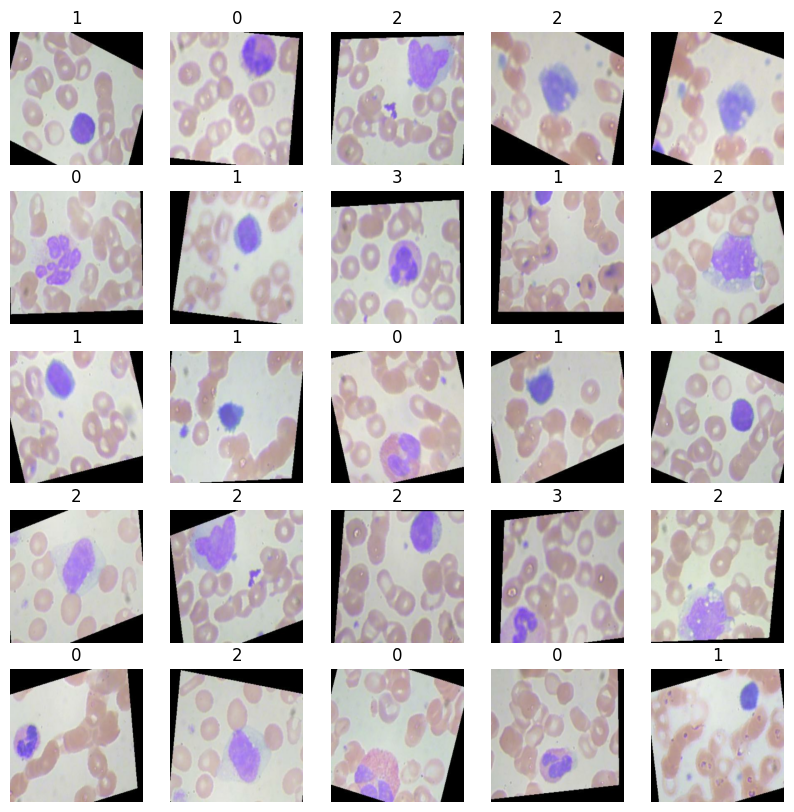

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [15]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [151]:
images.shape

(2, 427, 640, 3)

In [16]:
train_ds.class_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [18]:
import tensorflow as tn
normalization_layer = tn.keras.layers.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [20]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[2]

In [21]:
print(np.min(first_image), np.max(first_image))

0.0 0.99341303


In [22]:
AUTOTUNE = tn.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
#Model one :
num_classes = 4

model = tn.keras.Sequential([
  tn.keras.layers.Rescaling(1./255),
  tn.keras.layers.Conv2D(filters = 16, kernel_size = 2, activation='relu'),
  tn.keras.layers.MaxPooling2D(),
  tn.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation='relu'),
  tn.keras.layers.MaxPooling2D(),
  tn.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation='relu'),
  tn.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation='relu'),
  tn.keras.layers.MaxPooling2D(),
  tn.keras.layers.Flatten(),
  tn.keras.layers.Dense(128, activation='relu'),
  tn.keras.layers.Dense(num_classes)
])

In [27]:
model.compile(
  optimizer='adam',
  loss=tn.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [28]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
249/249 [==============================] - 51s 204ms/step - loss: 1.2930 - accuracy: 0.3586 - val_loss: 1.1235 - val_accuracy: 0.4917
Epoch 2/50
249/249 [==============================] - 57s 230ms/step - loss: 1.0325 - accuracy: 0.5423 - val_loss: 0.9460 - val_accuracy: 0.5866
Epoch 3/50
249/249 [==============================] - 56s 225ms/step - loss: 0.7588 - accuracy: 0.6803 - val_loss: 0.7091 - val_accuracy: 0.6871
Epoch 4/50
249/249 [==============================] - 55s 221ms/step - loss: 0.5773 - accuracy: 0.7595 - val_loss: 0.6717 - val_accuracy: 0.6951
Epoch 5/50
249/249 [==============================] - 55s 222ms/step - loss: 0.4303 - accuracy: 0.8240 - val_loss: 0.5509 - val_accuracy: 0.7624
Epoch 6/50
249/249 [==============================] - 57s 229ms/step - loss: 0.3138 - accuracy: 0.8767 - val_loss: 0.6975 - val_accuracy: 0.7283
Epoch 7/50
249/249 [==============================] - 57s 229ms/step - loss: 0.2373 - accuracy: 0.9128 - val_loss: 0.7394 - val_ac

In [29]:
import pandas as pd
pd.DataFrame(history.history).to_csv("history_nine_upd.csv")

In [30]:
history.history

{'loss': [1.2929532527923584,
  1.0324556827545166,
  0.7588399052619934,
  0.5772931575775146,
  0.4302878677845001,
  0.31380540132522583,
  0.23728840053081512,
  0.16997820138931274,
  0.1623060405254364,
  0.1112317144870758,
  0.11310434341430664,
  0.06746993958950043,
  0.03321691229939461,
  0.023259121924638748,
  0.024542825296521187,
  0.016027648001909256,
  0.05348554626107216,
  0.025691140443086624,
  0.007030797656625509,
  0.03917580470442772,
  0.0062637184746563435,
  0.0018203476211056113,
  0.0005487552261911333,
  0.00022225275461096317,
  0.00015933471149764955,
  0.00012310662714298815,
  9.831609349930659e-05,
  8.013622573344037e-05,
  6.637701881118119e-05,
  5.557188342208974e-05,
  4.6810342610115185e-05,
  3.9685510273557156e-05,
  3.3825766877271235e-05,
  2.894099998229649e-05,
  2.4832455892465077e-05,
  2.1365713109844364e-05,
  1.842486744862981e-05,
  1.5914176401565783e-05,
  1.3764591130893677e-05,
  1.191213414131198e-05,
  1.0316774023522157e-05

In [31]:
# Model 2:
num_classes = 4

model = tn.keras.Sequential([
  tn.keras.layers.Rescaling(1./255),
  tn.keras.layers.Conv2D(filters = 16, kernel_size = 2, activation='relu'),
  tn.keras.layers.Conv2D(filters = 16, kernel_size = 2, activation='relu'), 
  tn.keras.layers.MaxPooling2D(),
  tn.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation='relu'),
  tn.keras.layers.MaxPooling2D(),
  tn.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation='relu'),
  tn.keras.layers.Conv2D(filters = 64, kernel_size = 2, activation='relu'),
  tn.keras.layers.MaxPooling2D(),
  tn.keras.layers.Flatten(),
  tn.keras.layers.Dense(128, activation='relu'),
  tn.keras.layers.Dense(num_classes)
])

In [32]:
model.compile(
  optimizer='adam',
  loss=tn.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [33]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
249/249 [==============================] - 99s 394ms/step - loss: 1.3562 - accuracy: 0.3101 - val_loss: 1.1555 - val_accuracy: 0.5068
Epoch 2/50
249/249 [==============================] - 114s 456ms/step - loss: 0.9491 - accuracy: 0.5810 - val_loss: 0.9549 - val_accuracy: 0.5766
Epoch 3/50
249/249 [==============================] - 100s 400ms/step - loss: 0.5779 - accuracy: 0.7452 - val_loss: 0.4909 - val_accuracy: 0.7805
Epoch 4/50
249/249 [==============================] - 103s 414ms/step - loss: 0.3783 - accuracy: 0.8396 - val_loss: 0.4617 - val_accuracy: 0.8051
Epoch 5/50
249/249 [==============================] - 121s 488ms/step - loss: 0.2523 - accuracy: 0.8959 - val_loss: 0.3855 - val_accuracy: 0.8363
Epoch 6/50
249/249 [==============================] - 117s 471ms/step - loss: 0.1697 - accuracy: 0.9356 - val_loss: 0.4301 - val_accuracy: 0.8403
Epoch 7/50
249/249 [==============================] - 116s 467ms/step - loss: 0.1104 - accuracy: 0.9602 - val_loss: 0.4406 - 

In [34]:
import pandas as pd
pd.DataFrame(history.history).to_csv("history_ten_upd.csv")

1/1 [==============================] - 0s 225ms/step
THE belongs to:LYMPHOCYTE


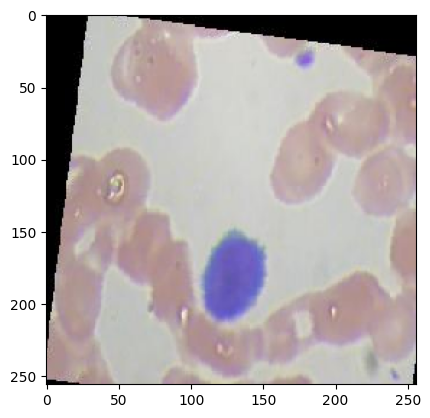

In [30]:
img = keras.utils.load_img("TRAIN/LYMPHOCYTE/_0_2874.jpeg", target_size=(256, 256))
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tn.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = [float(keras.activations.sigmoid(predictions[0][i])) for i in range(4)]
print("THE belongs to:{0}".format(ls[score.index(max(score))]))
